In [9]:
# Cell 1: Importing Necessary Packages
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random


In [10]:
# Cell 2: Loading the Training and Testing Data from CSV

# Load CSV files
train_df = pd.read_csv("mnist_train.csv")
test_df = pd.read_csv("mnist_test.csv")

# First column is the label, remaining columns are pixel values
y_train = train_df.iloc[:, 0].values
x_train = train_df.iloc[:, 1:].values

y_test = test_df.iloc[:, 0].values
x_test = test_df.iloc[:, 1:].values

# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape images to 28x28 for Keras
x_train = x_train.reshape(-1, 28, 28)
x_test = x_test.reshape(-1, 28, 28)


In [11]:
# Cell 3: Define the Network Architecture Using Keras
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

model.summary()


C:\Users\vaish\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Cell 4: Train the Model Using SGD
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(x_train,
                    y_train,
                    validation_data=(x_test, y_test),
                    epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9252 - loss: 0.2657 - val_accuracy: 0.9295 - val_loss: 0.2435
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9325 - loss: 0.2430 - val_accuracy: 0.9345 - val_loss: 0.2249
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9371 - loss: 0.2247 - val_accuracy: 0.9390 - val_loss: 0.2090
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9416 - loss: 0.2084 - val_accuracy: 0.9432 - val_loss: 0.1960
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9455 - loss: 0.1949 - val_accuracy: 0.9460 - val_loss: 0.1864
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9494 - loss: 0.1832 - val_accuracy: 0.9483 - val_loss: 0.1750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9516 - loss: 0.1727 - val_accuracy: 0.9515 - val_loss: 0.1669
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9545 - loss: 0.1632 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9577 - loss: 0.1469
Loss: 0.147
Accuracy: 0.958


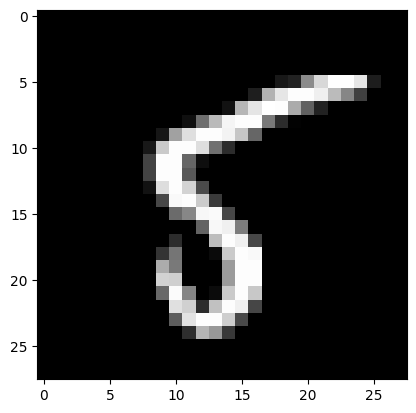

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step  


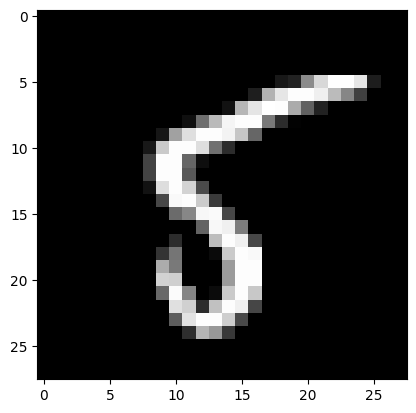

Predicted Value : 5


In [18]:
# Cell 5: Evaluate the Network
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Loss: {test_loss:.3f}")
print(f"Accuracy: {test_acc:.3f}")

n = random.randint(0, x_test.shape[0] - 1)
plt.imshow(x_test[n], cmap="gray")
plt.show()

predicted_value = model.predict(x_test)
plt.imshow(x_test[n], cmap="gray")
plt.show()
print("Predicted Value :", np.argmax(predicted_value[n]))


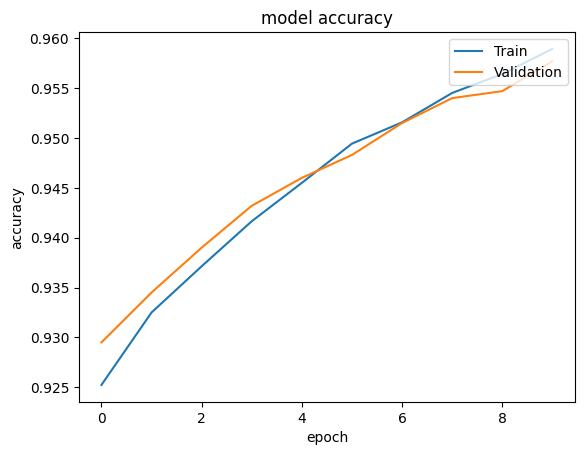

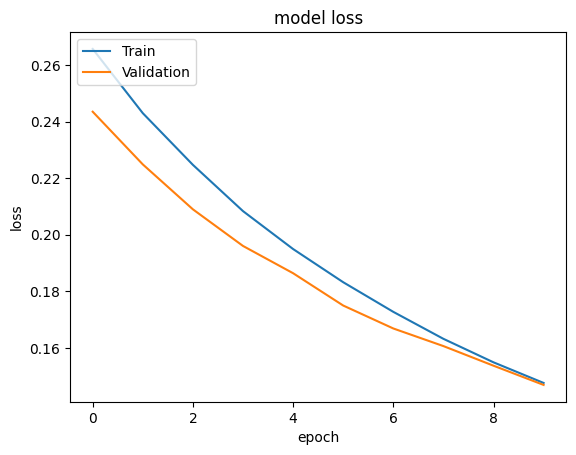

In [19]:
# Cell 6: Plot the Training Loss and Accuracy

# Plotting The Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plotting The Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
